<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Maksim Dimitrijev and Özlem Salehi | October 02, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Grover's Search Implementation</h2>

<a id="task1"></a>
<h3>Task 1</h3>

Let $N=4$. Implement the query phase and check the unitary matrix for the query operator. Note that we are interested in the top-left $4 \times 4$ part of the matrix since the remaining parts are due to the ancilla qubit.

First run the following cell to load operator $U_f$. You can access it via:

   f(circuit,qreg).

In [5]:
%run f.py

Now let's use phase kickback to flip the sign of the marked element:

<ul>
    <li>Set ancilla qubit to $\ket{-}$ by applying X and H.</li>
    <li>Apply operator $U_f$ by calling function $f$
    <li>Set ancilla qubit back.</li>
</ul>

Can you guess the marked elemeny by looking at the unitary matrix?

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

mycircuit = QuantumCircuit(qreg,creg)


#set ancilla
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

f(mycircuit,qreg)  
    
#set ancilla back
mycircuit.h(qreg[2])
mycircuit.x(qreg[2]) 


job = execute(mycircuit,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    

mycircuit.draw(output='mpl')

  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


<Figure size 668.889x526.75 with 1 Axes>

<a id="task2"></a>
<h3>Task 2</h3>


Let $N=4$. Implement the inversion operator and check whether you obtain the following matrix:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

<h3>Solution</h3>

In [4]:
def inversion(circuit,quantum_reg):
    
    
    #step 1
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])
    
    #step 2
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 3
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[2])

    #step 4
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])
    
    #step 5
    circuit.x(quantum_reg[2])
    
    #step 6
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])






Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

 -0.5  0.5  0.5  0.5  0.0  0.0  0.0  0.0
  0.5 -0.5  0.5  0.5  0.0  0.0  0.0  0.0
  0.5  0.5 -0.5  0.5  0.0  0.0  0.0  0.0
  0.5  0.5  0.5 -0.5  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


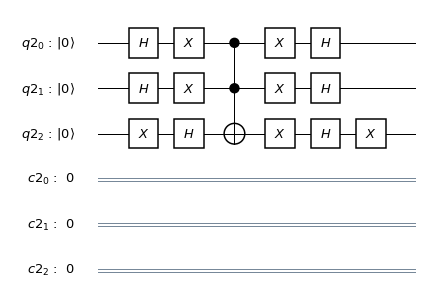

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

#set ancilla qubit
mycircuit1.x(qreg1[2])
mycircuit1.h(qreg1[2])
    
inversion(mycircuit1,qreg1)

#set ancilla qubit back
mycircuit1.h(qreg1[2])
mycircuit1.x(qreg1[2])


job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
mycircuit1.draw(output='mpl')

<a id="task3"></a>
<h3>Task 3: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

First run the following cell to load operator $U_f$. You can access it via:
   f(circuit,qreg)
    
Which state do you observe the most? (Note that the last qubit is the ancilla and it is shared by the query and the inversion operators)

In [11]:
%run f.py

<h3>Solution</h3>

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

mycircuit = QuantumCircuit(qreg,creg)

#Grover


#initial step - equal superposition
for i in range(2):
    mycircuit.h(qreg[i])

#set ancilla
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

mycircuit.barrier()

#change the number of iterations
iterations=1

#Grover's iterations.
for i in range(iterations):
    #query
    f(mycircuit,qreg)
    
    mycircuit.barrier()
    #inversion
    inversion(mycircuit,qreg)
    mycircuit.barrier()
    
    
#set ancilla back
mycircuit.h(qreg[2])
mycircuit.x(qreg[2]) 
    
mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(mycircuit)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')

NameError: name 'inversion' is not defined

<a id="task4"></a>
<h3>Task 4 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to implement not gate controlled by three qubits.

In the implementation the ancilla qubit will be qubit 4, while qubits for control are 0, 1 and 2; qubit 3 is used for th multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

<h3>Solution</h3>

In [2]:
def big_inversion(circuit,quantum_reg):
   

    for i in range(3):
        circuit.h(quantum_reg[i])
        circuit.x(quantum_reg[i])

    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[4])
    circuit.ccx(quantum_reg[2],quantum_reg[4],quantum_reg[3])
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[4])

    for i in range(3):
        circuit.x(quantum_reg[i])
        circuit.h(quantum_reg[i])

    
    circuit.x(quantum_reg[3])
    
   

Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg2 =  QuantumRegister(5)
big_creg2 = ClassicalRegister(5)

big_mycircuit2 = QuantumCircuit(big_qreg2,big_creg2)

#set ancilla
big_mycircuit2.x(big_qreg2[3])
big_mycircuit2.h(big_qreg2[3])
    
big_inversion(big_mycircuit2,big_qreg2)

#set ancilla back
big_mycircuit2.h(big_qreg2[3])
big_mycircuit2.x(big_qreg2[3])

job = execute(big_mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit2,decimals=3)
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

 -0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25 -0.75  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25 -0.75  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25 -0.75  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25 -0.75  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25 -0.75  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25 -0.75  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.75


<a id="task5"></a>
<h3>Task 5: Testing Grover's search for 8 elements (Optional, challenging)</h3>

Now we will test Grover's search on 8 elements.

First run the following cell to load operator $U_f$. You can access it via:

You can access the operator $U_{f_8}$ by f_8(circuit,qreg)
    
Which state do you observe the most?  (Note that the last two qubits are extra qubits.)

<h3>Solution</h3>

00100 is observed 77 times
11100 is observed 76 times
10000 is observed 84 times
01000 is observed 86 times
01100 is observed 77 times
00000 is observed 85 times
11000 is observed 9431 times
10100 is observed 84 times


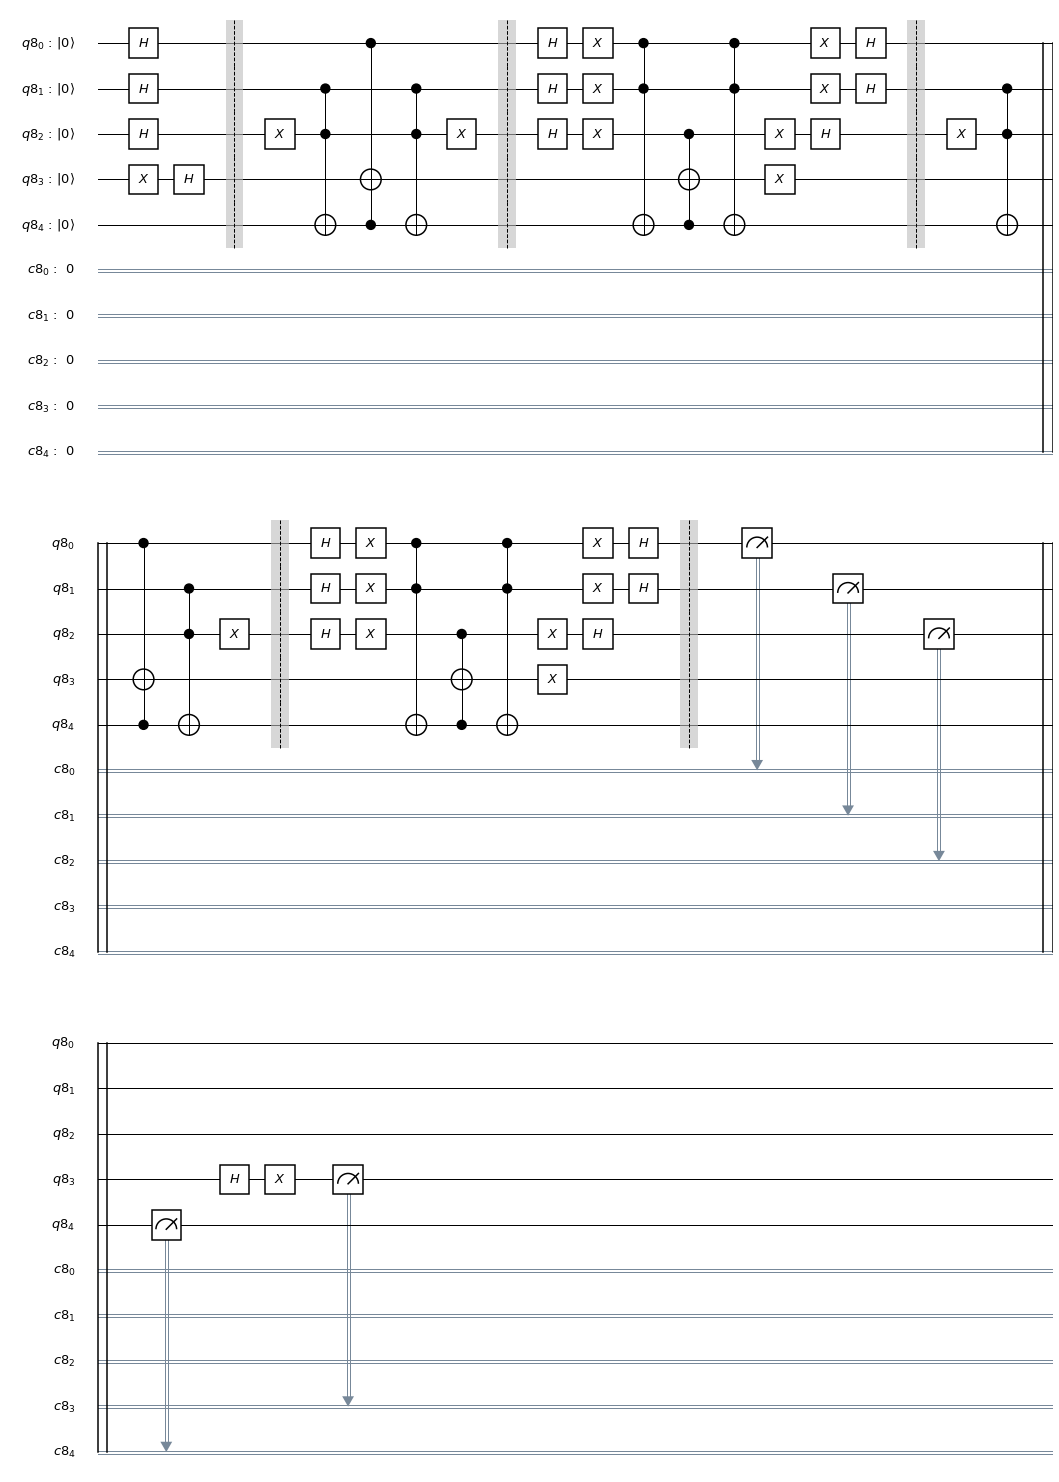

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg8 =  QuantumRegister(5)
creg8 = ClassicalRegister(5)

mycircuit8 = QuantumCircuit(qreg8,creg8)

#set ancilla
mycircuit8.x(qreg8[3])
mycircuit8.h(qreg8[3])

#Grover
for i in range(3):
    mycircuit8.h(qreg8[i])

mycircuit8.barrier()

#Try 1,2,6,12 8iterations of Grover
for i in range(2):
    f_8(mycircuit8,qreg8)
    mycircuit8.barrier()
    big_inversion(mycircuit8,qreg8)
    mycircuit8.barrier()

#set ancilla back

mycircuit8.h(qreg8[3])
mycircuit8.x(qreg8[3])

mycircuit8.measure(qreg8,creg8)

job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
counts8 = job.result().get_counts(mycircuit8)
# print the reverse of the outcome
for outcome in counts8:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts8[outcome],"times")

mycircuit8.draw(output='mpl')